In [1]:
import pandas as pd
import seaborn as sns
import scipy
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from data_dicts import drop_cols
from data_prep import county_info_2016, county_info_2018, results_info, create_targets
from model_prep import lin_mod_func, run_model, make_predictions
from visualizations import display_results

## Data

The demographic information was obtained from the U.S. Cencus website. The 5 year study was used in order to obtain the most accurate information for smaller countues. The results data was obtained from the MIT Election Data and Science Lab.

In [2]:
features_2016 = county_info_2016()
features_2018 = county_info_2018()
results_2016 = results_info(2016)

In [3]:
df = pd.merge(features_2016, results_2016, on='County')
df = create_targets(df)

In [8]:
df.tail()

,County,Percent Less than 9th grade,"Percent 9th to 12th grade, no diploma",Percent High school graduate,"Percent Some college, no degree",Percent Associate's degree,Percent Bachelor's degree,Percent Graduate or professional degree,Total population,Median age,...,Percent Hispanic or Latino,Households Median income,Households Mean income,State,Republican,Democrat,Other,Percent Republican,Percent Democrat,Percent Other
3059,"Teton County, Wyoming, 2016",2.4,2.2,15.8,19.5,6.2,38.4,15.4,22623,38.4,...,15.2,75594,115534,Wyoming,3921,7314,1392,0.173319,0.323299,0.061530
3060,"Uinta County, Wyoming, 2016",3.0,7.4,36.6,26.1,8.8,13.3,5.0,20893,34.8,...,9.0,53323,70276,Wyoming,6154,1202,1114,0.294548,0.057531,0.053319
3061,"Washakie County, Wyoming, 2016",3.6,8.9,30.8,27.0,8.6,14.9,6.2,8351,43.5,...,14.0,46212,61440,Wyoming,2911,532,371,0.348581,0.063705,0.044426
3062,"Weston County, Wyoming, 2016",1.5,7.1,32.7,30.9,9.0,12.4,6.4,7175,43.8,...,1.0,55640,67135,Wyoming,3033,299,194,0.422718,0.041672,0.027038
3063,"Washington city County, District of Columbia, ...",4.0,6.0,18.0,13.5,3.1,23.4,32.0,659009,33.8,...,10.5,72935,110614,District of Columbia,12723,282830,15715,0.019306,0.429175,0.023846


# EDA

In [14]:
selected_features = ['Median age',
                     'Sex ratio (males per 100 females)',
                     'Households Median income',
                     'Percent Graduate or professional degree']

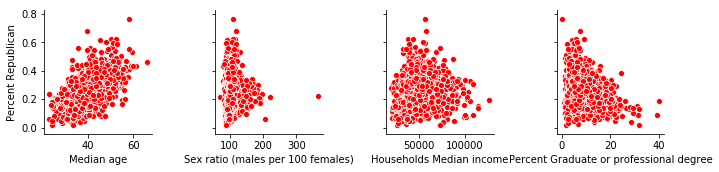

In [15]:
sns.pairplot(df, x_vars=selected_features, y_vars='Percent Republican', plot_kws={'color': 'red'});

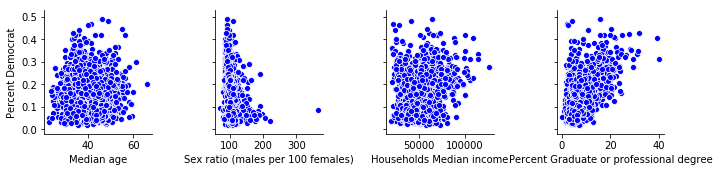

In [16]:
sns.pairplot(df, x_vars=selected_features, y_vars='Percent Democrat', plot_kws={'color': 'blue'});

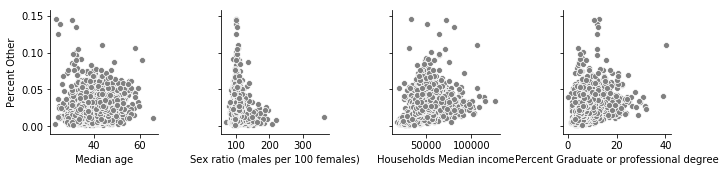

In [17]:
sns.pairplot(df, x_vars=selected_features, y_vars='Percent Other', plot_kws={'color': 'gray'});

In [18]:
#df['Percent Republican'].idxmax() 

In [19]:
#df['Percent Democrat'].idxmax()

In [20]:
#df['Percent Other'].idxmax()

In [21]:
#df.iloc[2653]

In [22]:
#df.iloc[1183]

In [23]:
#df.iloc[613]

In [24]:
#df[df['State'] == 'Alabama']

## Methodology

In [25]:
y_R = df['Percent Republican']
y_D = df['Percent Democrat']
y_O = df['Percent Other']

X = df.drop(columns=drop_cols)

In [26]:
# Train Test Split for each party
X_train, X_test, y_train_R, y_test_R = train_test_split(X, y_R, random_state=2020)
X_train, X_test, y_train_D, y_test_D = train_test_split(X, y_D, random_state=2020)
X_train, X_test, y_train_O, y_test_O = train_test_split(X, y_O, random_state=2020)

In [27]:
R_model = lin_mod_func(X_train, X_test, y_train_R, y_test_R)

Training R^2 : 0.5104037476344672
Training Root Mean Square Error 0.05801569879764681
----------------
Testing R^2 : 0.450266594008354
Testing Root Mean Square Error 0.06347405753646587


In [28]:
D_model = lin_mod_func(X_train, X_test, y_train_D, y_test_D)

Training R^2 : 0.42453336821260457
Training Root Mean Square Error 0.054879168553340234
----------------
Testing R^2 : 0.4075515314217574
Testing Root Mean Square Error 0.05760091304716238


In [29]:
O_model = lin_mod_func(X_train, X_test, y_train_O, y_test_O)

Training R^2 : 0.4980836027477319
Training Root Mean Square Error 0.010353110777421454
----------------
Testing R^2 : 0.47392634356495994
Testing Root Mean Square Error 0.01087021642351198


In [30]:
# Scale data
#scaler = StandardScaler()
# # mmscaler = MinMaxScaler()
#scaler.fit(X_train)
# X_train, X_test, y_train, y_test = train_test_split(X, y_R)

# for target in targets:

# linreg = LinearRegression()
# linreg.fit(X_train, y_train)

# run_model(linreg, X_train, X_test, y_train, y_test)

In [31]:
from sklearn.pipeline import Pipeline

pipe_scl_lin = Pipeline([('scl', StandardScaler()), ('lin', LinearRegression())])
pipe_mms_lin = Pipeline([('mms', MinMaxScaler()), ('lin', LinearRegression())])

pipelines = [pipe_scl_lin, pipe_mms_lin]
pipeline_names = ['Standard Scalar Linear','Min Max Linear']

y_trains = [y_train_R, y_train_D, y_train_O]
for y in y_trains: 
#for target in targets:
    for pipe in pipelines:
        print(pipe)
        pipe.fit(X_train, y)
    
# Compare accuracies
targets = [y_test_R, y_test_D, y_test_O]
for target in targets:
    for index, val in enumerate(pipelines):
        print('%s pipeline test accuracy: %.3f' % (pipeline_names[index],
                                                   val.score(X_test, target)))

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lin'

## Evaluate model

In [32]:
# models = {R_model: y_train_R, D_model: y_train_D, O_model: y_train_O}
# for key, val in models:
#     cv_results = cross_validate(key, X_train, val, cv=3)
#     print(cv_results['test_score'])

In [33]:
cv_results = cross_validate(R_model, X_train, y_train_R, cv=3)
print(cv_results['test_score'])

[0.47734467 0.50821115 0.5016531 ]


In [34]:
cv_results = cross_validate(D_model, X_train, y_train_D, cv=3)
print(cv_results['test_score'])

[0.41111189 0.41131525 0.41865955]


In [35]:
cv_results = cross_validate(O_model, X_train, y_train_O, cv=3)
print(cv_results['test_score'])

[0.47402037 0.47670543 0.49823093]


In [36]:
# Run feature selection
rfe_R = RFECV(LinearRegression(),cv=5)
X_rfe_train_R = rfe_R.fit_transform(X_train, y_train_R)
X_rfe_test_R = rfe_R.transform(X_test)
lm = LinearRegression().fit(X_rfe_train_R, y_train_R)
run_model(lm, X_rfe_train_R, X_rfe_test_R, y_train_R, y_test_R)
print ('The optimal number of features is: ', rfe_R.n_features_)

Training R^2 : 0.5093863639545032
Training Root Mean Square Error 0.05807594598449294
----------------
Testing R^2 : 0.45351661976691887
Testing Root Mean Square Error 0.06328614997563849
The optimal number of features is:  17


In [37]:
# Run feature selection
rfe_D = RFECV(LinearRegression(),cv=5)
X_rfe_train_D = rfe_D.fit_transform(X_train, y_train_D)
X_rfe_test_D = rfe_D.transform(X_test)
lm = LinearRegression().fit(X_rfe_train_D, y_train_D)
run_model(lm, X_rfe_train_D, X_rfe_test_D, y_train_D, y_test_D)
print ('The optimal number of features is: ', rfe_D.n_features_)

Training R^2 : 0.42453336821260457
Training Root Mean Square Error 0.054879168553340234
----------------
Testing R^2 : 0.4075515314217574
Testing Root Mean Square Error 0.05760091304716238
The optimal number of features is:  18


In [38]:
# Run feature selection
rfe_O = RFECV(LinearRegression(),cv=5)
X_rfe_train_O = rfe_O.fit_transform(X_train, y_train_O)
X_rfe_test_O = rfe_O.transform(X_test)
lm = LinearRegression().fit(X_rfe_train_O, y_train_O)
run_model(lm, X_rfe_train_O, X_rfe_test_O, y_train_O, y_test_O)
print ('The optimal number of features is: ', rfe_O.n_features_)

Training R^2 : 0.4980836027477319
Training Root Mean Square Error 0.010353110777421454
----------------
Testing R^2 : 0.47392634356495966
Testing Root Mean Square Error 0.010870216423511981
The optimal number of features is:  18


In [39]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
# for column in X_train.columns.tolist():
#     print(scipy.stats.pearsonr(X_train[column], y_train_R), column)

In [40]:
# for column in X_train.columns.tolist():
#     print(scipy.stats.pearsonr(X_train[column], y_train_D), column)

In [41]:
# for column in X_train.columns.tolist():
#     print(scipy.stats.pearsonr(X_train[column], y_train_O), column)

In [42]:
train_actual_R = make_predictions('Republican', R_model, X_train, y_train_R, df)
test_actual_R = make_predictions('Republican', R_model, X_test, y_test_R, df)
train_actual_D = make_predictions('Democrat', D_model, X_train, y_train_D, df)
test_actual_D = make_predictions('Democrat', D_model, X_test, y_test_D, df)
train_actual_O = make_predictions('Other', O_model, X_train, y_train_O, df)
test_actual_O = make_predictions('Other', O_model, X_test, y_test_O, df)

In [43]:
actual_R = make_predictions('Republican', R_model, X, y_R, df)
actual_D = make_predictions('Democrat', D_model, X, y_D, df)
actual_O = make_predictions('Other', O_model, X, y_O, df)

In [44]:
actual_R.head()

,County,Total population,Percent Republican,Republican,Republican Predictions,Republican % off,Republican % off Abs,Republican Votes Prediction
0,"Wilcox County, Alabama, 2016",11119,0.156219,1737,0.252955,61.922952,61.922952,2813.0
1,"Winston County, Alabama, 2016",24013,0.384292,9228,0.268164,-30.218744,30.218744,6439.0
2,"Apache County, Arizona, 2016",72346,0.113897,8240,0.224347,96.973237,96.973237,16231.0
3,"Cochise County, Arizona, 2016",128177,0.219166,28092,0.260443,18.833807,18.833807,33383.0
4,"Coconino County, Arizona, 2016",138064,0.152886,21108,0.160585,5.035784,5.035784,22171.0


In [45]:
final_df = pd.merge(df['State'], actual_R, left_index=True, right_index=True)
final_df = final_df.merge(actual_D, left_index=True, right_index=True)
final_df = final_df.merge(actual_O, left_index=True, right_index=True)
final_df = final_df.drop(columns=['Total population', 'Total population_y',
                                  'County_y', 'County'])
final_df = final_df.rename(columns={'Total population_x': 'Total population',
                                    'County_x': 'County'})

In [46]:
final_df

,State,County,Total population,Percent Republican,Republican,Republican Predictions,Republican % off,Republican % off Abs,Republican Votes Prediction,Percent Democrat,...,Democrat Predictions,Democrat % off,Democrat % off Abs,Democrat Votes Prediction,Percent Other,Other,Other Predictions,Other % off,Other % off Abs,Other Votes Prediction
0,Alabama,"Wilcox County, Alabama, 2016",11119,0.156219,1737,0.252955,61.922952,61.922952,2813.0,0.390233,...,0.131610,-66.274024,66.274024,1463.0,0.003777,42,0.007281,92.768712,92.768712,81.0
1,Alabama,"Winston County, Alabama, 2016",24013,0.384292,9228,0.268164,-30.218744,30.218744,6439.0,0.036314,...,0.151480,317.143942,317.143942,3637.0,0.008870,213,0.013194,48.746340,48.746340,317.0
2,Arizona,"Apache County, Arizona, 2016",72346,0.113897,8240,0.224347,96.973237,96.973237,16231.0,0.236129,...,0.072655,-69.230672,69.230672,5256.0,0.032317,2338,0.018077,-44.062874,44.062874,1308.0
3,Arizona,"Cochise County, Arizona, 2016",128177,0.219166,28092,0.260443,18.833807,18.833807,33383.0,0.136140,...,0.143591,5.473190,5.473190,18405.0,0.034897,4473,0.034828,-0.198292,0.198292,4464.0
4,Arizona,"Coconino County, Arizona, 2016",138064,0.152886,21108,0.160585,5.035784,5.035784,22171.0,0.234703,...,0.196518,-16.269531,16.269531,27132.0,0.045428,6272,0.035968,-20.825075,20.825075,4966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,Wyoming,"Teton County, Wyoming, 2016",22623,0.173319,3921,0.247851,43.002863,43.002863,5607.0,0.323299,...,0.251060,-22.344546,22.344546,5680.0,0.061530,1392,0.039334,-36.073721,36.073721,890.0
3060,Wyoming,"Uinta County, Wyoming, 2016",20893,0.294548,6154,0.273718,-7.072038,7.072038,5719.0,0.057531,...,0.091648,59.301185,59.301185,1915.0,0.053319,1114,0.024535,-53.985366,53.985366,513.0
3061,Wyoming,"Washakie County, Wyoming, 2016",8351,0.348581,2911,0.323589,-7.169656,7.169656,2702.0,0.063705,...,0.123141,93.298248,93.298248,1028.0,0.044426,371,0.030629,-31.056800,31.056800,256.0
3062,Wyoming,"Weston County, Wyoming, 2016",7175,0.422718,3033,0.336595,-20.373626,20.373626,2415.0,0.041672,...,0.108217,159.684689,159.684689,776.0,0.027038,194,0.031452,16.325566,16.325566,226.0


### Aggregate on state level

In [47]:
states = final_df.State.unique().tolist()

In [48]:
len(states)

50

In [52]:
states

['Alabama',
 'Arizona',
 'Arkansas',
 'Illinois',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Kentucky',
 'Louisiana',
 'Indiana',
 'Iowa',
 'Kansas',
 'Missouri',
 'Montana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'Tennessee',
 'Texas',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Virginia',
 'Washington',
 'Utah',
 'Vermont',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'District of Columbia']

In [53]:
final_df[final_df.State == 'Alabama']

,State,County,Total population,Percent Republican,Republican,Republican Predictions,Republican % off,Republican % off Abs,Republican Votes Prediction,Percent Democrat,...,Democrat Predictions,Democrat % off,Democrat % off Abs,Democrat Votes Prediction,Percent Other,Other,Other Predictions,Other % off,Other % off Abs,Other Votes Prediction
0,Alabama,"Wilcox County, Alabama, 2016",11119,0.156219,1737,0.252955,61.922952,61.922952,2813.0,0.390233,...,0.131610,-66.274024,66.274024,1463.0,0.003777,42,0.007281,92.768712,92.768712,81.0
1,Alabama,"Winston County, Alabama, 2016",24013,0.384292,9228,0.268164,-30.218744,30.218744,6439.0,0.036314,...,0.151480,317.143942,317.143942,3637.0,0.008870,213,0.013194,48.746340,48.746340,317.0
92,Alabama,"Autauga County, Alabama, 2016",55049,0.330106,18172,0.242002,-26.689701,26.689701,13322.0,0.107831,...,0.151123,40.147969,40.147969,8319.0,0.015713,865,0.025283,60.901097,60.901097,1392.0
93,Alabama,"Baldwin County, Alabama, 2016",199510,0.365310,72883,0.277108,-24.144421,24.144421,55286.0,0.092517,...,0.188988,104.274153,104.274153,37705.0,0.019418,3874,0.030898,59.125329,59.125329,6165.0
94,Alabama,"Barbour County, Alabama, 2016",26614,0.204930,5454,0.199491,-2.653712,2.653712,5309.0,0.183024,...,0.167812,-8.311374,8.311374,4466.0,0.005411,144,0.007696,42.234019,42.234019,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Alabama,"Talladega County, Alabama, 2016",81057,0.254315,20614,0.261755,2.925558,2.925558,21217.0,0.149537,...,0.121667,-18.637513,18.637513,9862.0,0.008290,672,0.016125,94.499301,94.499301,1307.0
153,Alabama,"Tallapoosa County, Alabama, 2016",40958,0.331901,13594,0.273623,-17.558923,17.558923,11207.0,0.134748,...,0.166550,23.601408,23.601408,6822.0,0.009107,373,0.014235,56.305915,56.305915,583.0
154,Alabama,"Tuscaloosa County, Alabama, 2016",202471,0.235703,47723,0.191282,-18.846148,18.846148,38729.0,0.156872,...,0.186350,18.791437,18.791437,37731.0,0.015879,3215,0.025011,57.514832,57.514832,5064.0
155,Alabama,"Walker County, Alabama, 2016",65593,0.369948,24266,0.273181,-26.156852,26.156852,17919.0,0.068559,...,0.130048,89.686643,89.686643,8530.0,0.010809,709,0.012161,12.506597,12.506597,798.0


In [54]:
#for state in states:
interests = ['Republican','Republican Votes Prediction',
             'Democrat', 'Democrat Votes Prediction',
             'Other','Other Votes Prediction']    

In [55]:
state_results = pd.DataFrame()
for state in states:
    state_results = state_results.append(final_df[final_df.State == state][interests].sum(),
                                     ignore_index=True)

In [56]:
state_results

,Democrat,Democrat Votes Prediction,Other,Other Votes Prediction,Republican,Republican Votes Prediction
0,729547.0,845098.0,75570.0,101675.0,1318250.0,1166094.0
1,1161167.0,1114281.0,190709.0,198199.0,1252401.0,1515694.0
2,380494.0,405798.0,64530.0,64228.0,684872.0,741415.0
3,3090729.0,2560991.0,321963.0,350288.0,2146015.0,2973759.0
4,8753788.0,7201733.0,943997.0,910850.0,4483810.0,7728777.0
5,1338870.0,1155396.0,238866.0,191170.0,1202484.0,1190411.0
6,897572.0,864569.0,74133.0,81190.0,673215.0,809112.0
7,235603.0,185880.0,22267.0,22241.0,185127.0,232027.0
8,4501194.0,3868749.0,296919.0,498364.0,4611108.0,5232619.0
9,1877963.0,1896823.0,147644.0,241069.0,2089104.0,2160377.0


In [57]:
# train_df_R = display_results(train_actual_R, y_hat_train, df['County'])
# test_df_R = display_results(test_actual, y_hat_test, df['County'])

In [58]:
# train_df.head()

In [59]:
# test_df.head()

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train_R)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test_R, y_pred))
print('R-sq score:', r2_score(y_test_R ,y_pred))

MSE score: 0.005015722313850137
R-sq score: 0.3156266475258046


In [62]:
# Training R^2 : 0.5007163542092132
# Training Root Mean Square Error 0.05887295782337749
# ----------------
# Testing R^2 : 0.4992196954893293
# Testing Root Mean Square Error 0.06039318774712403

In [63]:
y_check = regressor.predict(X_train)

In [64]:
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.figure(figsize=(15,6))
# plt.scatter(X, y, color = 'red', label='data')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'green', label='Regression function')
# plt.title('Decision Tree Regression')
# plt.xlabel('Features')
# plt.ylabel('Target')
# plt.legend()
# plt.show()

In [65]:
max(X)

'Sex ratio (males per 100 females)'

In [66]:
actual2_R = make_predictions('Republican', regressor, X, y_R, df)
#actual2_D = make_predictions('Democrat', D_model, X, y_D, df)
#actual2_O = make_predictions('Other', O_model, X, y_O, df)

In [67]:
actual2_R

,County,Total population,Percent Republican,Republican,Republican Predictions,Republican % off,Republican % off Abs,Republican Votes Prediction
0,"Wilcox County, Alabama, 2016",11119,0.156219,1737,0.259235,65.943440,65.943440,2882.0
1,"Winston County, Alabama, 2016",24013,0.384292,9228,0.311047,-19.059659,19.059659,7469.0
2,"Apache County, Arizona, 2016",72346,0.113897,8240,0.209121,83.605587,83.605587,15129.0
3,"Cochise County, Arizona, 2016",128177,0.219166,28092,0.311047,41.923279,41.923279,39869.0
4,"Coconino County, Arizona, 2016",138064,0.152886,21108,0.209121,36.782944,36.782944,28872.0
...,...,...,...,...,...,...,...,...
3059,"Teton County, Wyoming, 2016",22623,0.173319,3921,0.248682,43.482074,43.482074,5626.0
3060,"Uinta County, Wyoming, 2016",20893,0.294548,6154,0.209121,-29.002690,29.002690,4369.0
3061,"Washakie County, Wyoming, 2016",8351,0.348581,2911,0.311047,-10.767621,10.767621,2598.0
3062,"Weston County, Wyoming, 2016",7175,0.422718,3033,0.311047,-26.417305,26.417305,2232.0


In [68]:
# train2_df = display_results(train_actual, y_check, df['County'])
# test2_df = display_results(test_actual, y_pred, df['County'])

# 2020 Predictions

In [69]:
# Rio Arriba County, New Mexico does not have a reproted Household Median or Mean income 
Rio_2016_Median = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Median income']
Rio_2016_Mean = features_2016[features_2016['County'] == 'Rio Arriba County, New Mexico, 2016']['Households Mean income']

In [70]:
# Rio Arriba County, New Mexico is missing mean and median income info. Replacing with 2016 info.
values = {'Households Median income': Rio_2016_Median.values[0],
          'Households Mean income': Rio_2016_Mean.values[0]}

features_2018 = features_2018.fillna(value=values)
features_2020 = features_2018.drop(columns=['County','Total population'])

In [71]:
R_predictions_2020 = R_model.predict(features_2020)
D_predictions_2020 = D_model.predict(features_2020)
O_predictions_2020 = O_model.predict(features_2020)

In [72]:
R_2020_percent = pd.DataFrame(R_predictions_2020)
D_2020_percent = pd.DataFrame(D_predictions_2020)
O_2020_percent = pd.DataFrame(O_predictions_2020)

In [73]:
_ = features_2018['County'].str.split(',', expand=True)
_ = _.rename(columns={1: 'State'})

In [74]:
R_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

R_results_2020 = R_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

R_results_2020 = R_results_2020.merge(R_2020_percent,
                                      left_index=True,
                                      right_index=True)

R_results_2020 = R_results_2020.rename(columns={0: 'R Percent'})
R_results_2020['R Votes'] = (R_results_2020['R Percent'] * R_results_2020['Total population']).round()

In [75]:
R_results_2020

,County,State,Total population,R Percent,R Votes
0,"Autauga County, Alabama",Alabama,55200,0.236680,13065.0
1,"Baldwin County, Alabama",Alabama,208107,0.281763,58637.0
2,"Barbour County, Alabama",Alabama,25782,0.207911,5360.0
3,"Bibb County, Alabama",Alabama,22527,0.283237,6380.0
4,"Blount County, Alabama",Alabama,57645,0.277706,16008.0
...,...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,0.254362,2231.0
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,0.249318,5733.0
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,0.241946,8262.0
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,0.246262,8974.0


In [76]:
D_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

D_results_2020 = D_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

D_results_2020 = D_results_2020.merge(D_2020_percent,
                                      left_index=True,
                                      right_index=True)

D_results_2020 = D_results_2020.rename(columns={0: 'D Percent'})
D_results_2020['D Votes'] = (D_results_2020['D Percent'] * D_results_2020['Total population']).round()

In [77]:
D_results_2020

,County,State,Total population,D Percent,D Votes
0,"Autauga County, Alabama",Alabama,55200,0.185883,10261.0
1,"Baldwin County, Alabama",Alabama,208107,0.202509,42143.0
2,"Barbour County, Alabama",Alabama,25782,0.165338,4263.0
3,"Bibb County, Alabama",Alabama,22527,0.088483,1993.0
4,"Blount County, Alabama",Alabama,57645,0.134929,7778.0
...,...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,0.164072,1439.0
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,0.136141,3130.0
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,0.138389,4726.0
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,0.180810,6589.0


In [78]:
O_results_2020 = pd.DataFrame.merge(features_2018['County'],
                                  _['State'],
                                  left_index=True, right_index=True)

O_results_2020 = O_results_2020.merge(features_2018['Total population'],
                                  left_index=True, right_index=True)

O_results_2020 = O_results_2020.merge(O_2020_percent,
                                      left_index=True,
                                      right_index=True)

O_results_2020 = O_results_2020.rename(columns={0: 'O Percent'})
O_results_2020['O Votes'] = (O_results_2020['O Percent'] * O_results_2020['Total population']).round()

In [79]:
O_results_2020

,County,State,Total population,O Percent,O Votes
0,"Autauga County, Alabama",Alabama,55200,0.025171,1389.0
1,"Baldwin County, Alabama",Alabama,208107,0.029620,6164.0
2,"Barbour County, Alabama",Alabama,25782,0.005045,130.0
3,"Bibb County, Alabama",Alabama,22527,0.011789,266.0
4,"Blount County, Alabama",Alabama,57645,0.018509,1067.0
...,...,...,...,...,...
3216,"Vieques Municipio, Puerto Rico",Puerto Rico,8771,0.016822,148.0
3217,"Villalba Municipio, Puerto Rico",Puerto Rico,22993,0.019131,440.0
3218,"Yabucoa Municipio, Puerto Rico",Puerto Rico,34149,0.015027,513.0
3219,"Yauco Municipio, Puerto Rico",Puerto Rico,36439,0.014407,525.0


In [80]:
O_results_2020.State.value_counts()

 Texas                   254
 Georgia                 159
 Virginia                133
 Kentucky                120
 Missouri                115
 Kansas                  105
 Illinois                102
 North Carolina          100
 Iowa                     99
 Tennessee                95
 Nebraska                 93
 Indiana                  92
 Ohio                     88
 Minnesota                87
 Michigan                 83
 Mississippi              82
 Puerto Rico              78
 Oklahoma                 77
 Arkansas                 75
 Wisconsin                72
 Pennsylvania             67
 Florida                  67
 Alabama                  67
 South Dakota             66
 Colorado                 64
 Louisiana                64
 New York                 62
 California               58
 Montana                  56
 West Virginia            55
 North Dakota             53
 South Carolina           46
 Idaho                    44
 Washington               39
 Oregon       

In [81]:
O_results_2020[O_results_2020.State == 'District of Columbia']

,County,State,Total population,O Percent,O Votes


In [82]:
O_results_2020[O_results_2020['State'] == 'Delaware']

,County,State,Total population,O Percent,O Votes


In [83]:
O_results_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 5 columns):
County              3221 non-null object
State               3221 non-null object
Total population    3221 non-null int64
O Percent           3221 non-null float64
O Votes             3221 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 125.9+ KB


In [84]:
O_results_2020.State = O_results_2020.State.astype(str)

In [85]:
O_results_2020[O_results_2020['State'] == 'Delaware']

,County,State,Total population,O Percent,O Votes


In [86]:
O_results_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 5 columns):
County              3221 non-null object
State               3221 non-null object
Total population    3221 non-null int64
O Percent           3221 non-null float64
O Votes             3221 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 125.9+ KB


In [87]:
O_results_2020.head()

,County,State,Total population,O Percent,O Votes
0,"Autauga County, Alabama",Alabama,55200,0.025171,1389.0
1,"Baldwin County, Alabama",Alabama,208107,0.029620,6164.0
2,"Barbour County, Alabama",Alabama,25782,0.005045,130.0
3,"Bibb County, Alabama",Alabama,22527,0.011789,266.0
4,"Blount County, Alabama",Alabama,57645,0.018509,1067.0


In [88]:
O_results_2020['State'] = [el.strip() for el in  O_results_2020['State']]

In [89]:
O_results_2020['State'] == 'Alabama'

0        True
1        True
2        True
3        True
4        True
        ...  
3216    False
3217    False
3218    False
3219    False
3220    False
Name: State, Length: 3221, dtype: bool